# Assignment 5
## Phyllis Kho

In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame
(Don’t use any special options). Display the first few rows and the DataFrame info.

You should have seen that the dates were not automatically parsed into datetime types.

In [277]:
url = "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"
df = pd.read_csv(url)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index
Verify that this worked using the head and info functions.

In [286]:
mydf = pd.read_csv(url, parse_dates=['time', 'updated'], index_col='id')

In [287]:
# verify using head
mydf.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [284]:
# Verify using info
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

## 3) Use describe to get the basic statistics of all the columns
Note the highest and lowest magnitude of earthquakes in the databse.

In [288]:
mydf.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


The highest magnitude of earthquake is 120065 and the lowest is -0.97.

## 4) Use nlargest to get the top 20 earthquakes by magnitude
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

Examine the structure of the place column. The state / country information seems to be in there. How would you get it out?

In [289]:
mydf.nlargest(20, 'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,"56km WSW of Panguna, Papua New Guinea",earthquake


## 5) Extract the state or country using Pandas text data functions
Add it as a new column to the dataframe called country. Note that some of the “countries” are actually U.S. states.

In [290]:
# The country is stated after a comma and a whitespace
# ,\s* matches the comma and the whitespace after the comma
# expand=True creates dataframe with each part of the split occupying each column.
# We only want the second column which contains the country: [1]

mydf['country'] = mydf['place'].str.split(',\s*', expand=True)[1]
mydf

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24 18:25:07.628000+00:00,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10 01:04:25.209000+00:00,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01 01:15:02.814000+00:00,"9km WNW of Cobb, California",earthquake,California


## 6) Display each unique value from the new column
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [291]:
mydf['country'].unique()

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', None, 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Antarctica', 'Chile', 'Utah', 'Indonesia', 'Solomon Islands',
       'Micronesia', 'Oklahoma', 'Hawaii', 'Wyoming', 'Russia', 'Arizona',
       'Philippines', 'Bolivia', 'Greece', 'Japan', 'Puerto Rico', 'Iran',
       'Tonga', 'Wallis and Futuna', 'Colorado', 'Guam', 'CA', 'Idaho',
       'Pakistan', 'Burma', 'China', 'Peru', 'Costa Rica', 'East Timor',
       'Japan region', 'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Taiwan', 'Arkansas', 'South Sandwich Islands', 'Colombia',
       'Dominican Republic', 'Argentina', 'Texas', 'New Hampshire',
       'Saint Helena', 'Tanzania', 'Vanuatu', 'Bosnia and Herzegovina',
       'India', 'American Samoa', 'Tennessee', 'Kentucky', 'Serbia',
       'Nicaragua', 'Republic of the Congo', 'U.S. Virgin Islands', '',
       'Guatema

## 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [292]:
filtered_mydf = mydf[mydf['mag'] >= 4]
filtered_mydf

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake,None
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24 00:35:14.040000+00:00,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24 00:35:14.040000+00:00,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24 00:35:14.040000+00:00,"37km ESE of Santiago, Philippines",earthquake,Philippines


## 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes
Location name on the x axis, Earthquake count on the y axis

In [293]:
earthquake_counts = filtered_mydf.groupby('country').size()
earthquake_counts

country
                     344
Afghanistan          147
Alaska               486
Albania               14
Algeria               15
                    ... 
Vietnam                2
Wallis and Futuna     62
Washington             1
Yemen                 34
Zambia                 7
Length: 165, dtype: int64

In [210]:
# Top 5 countries and the number of earthquakes
top_5 = earthquake_counts.nlargest(5)
top_5

country
Indonesia           2112
Papua New Guinea    1354
Japan               1150
Chile               1119
New Zealand          758
dtype: int64

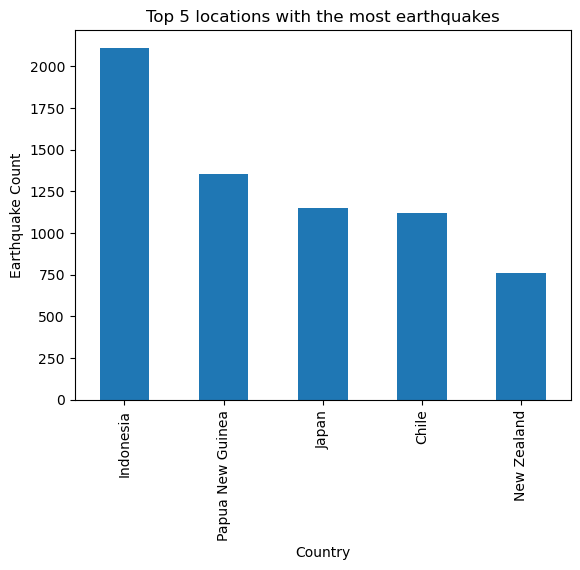

In [211]:
top_5.plot(kind='bar', x='country', xlabel ='Country', ylabel = 'Earthquake Count', title = 'Top 5 locations with the most earthquakes');


## 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset. Use a Logarithmic scale. What sort of relationship do you see?

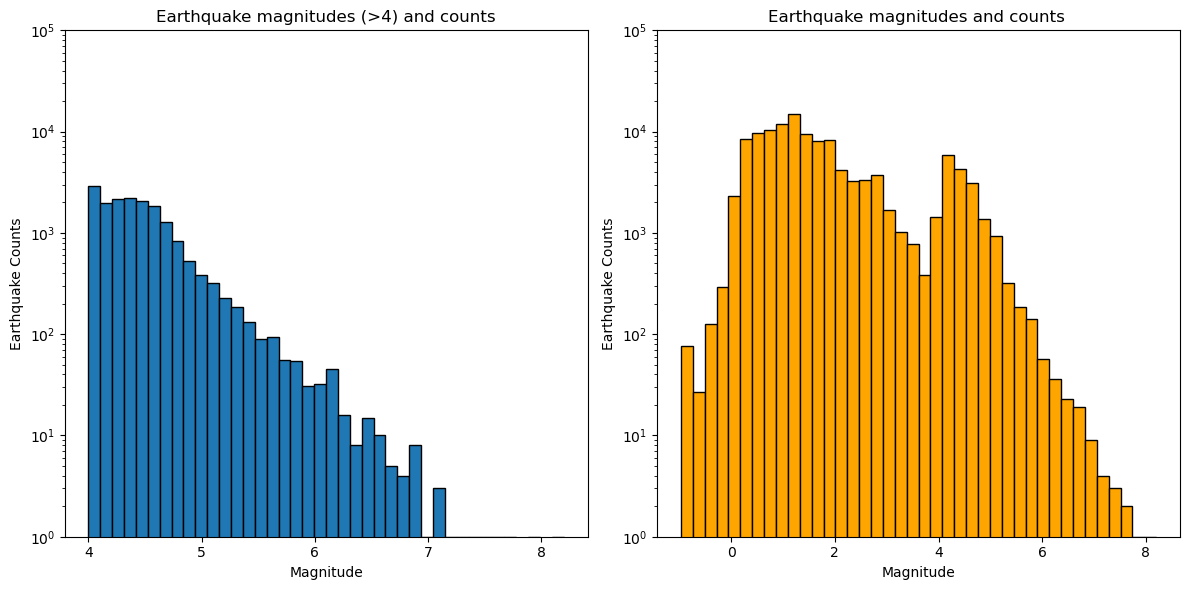

In [295]:
fig, axes = plt.subplots(figsize = (12,6),  ncols=2)

axes[0].hist(filtered_mydf['mag'], log=True, bins = 40, edgecolor='black');
axes[0].set_ylabel('Earthquake Counts');
axes[0].set_xlabel('Magnitude');
axes[0].set_title('Earthquake magnitudes (>4) and counts');
axes[0].set_ylim((1e0, 1e5));



axes[1].hist(mydf['mag'], log=True, bins = 40, color = 'orange', edgecolor='black');
axes[1].set_ylabel('Earthquake Counts');
axes[1].set_xlabel('Magnitude');
axes[1].set_title('Earthquake magnitudes and counts ');
axes[1].set_ylim((1e0, 1e5));

plt.tight_layout()

## 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

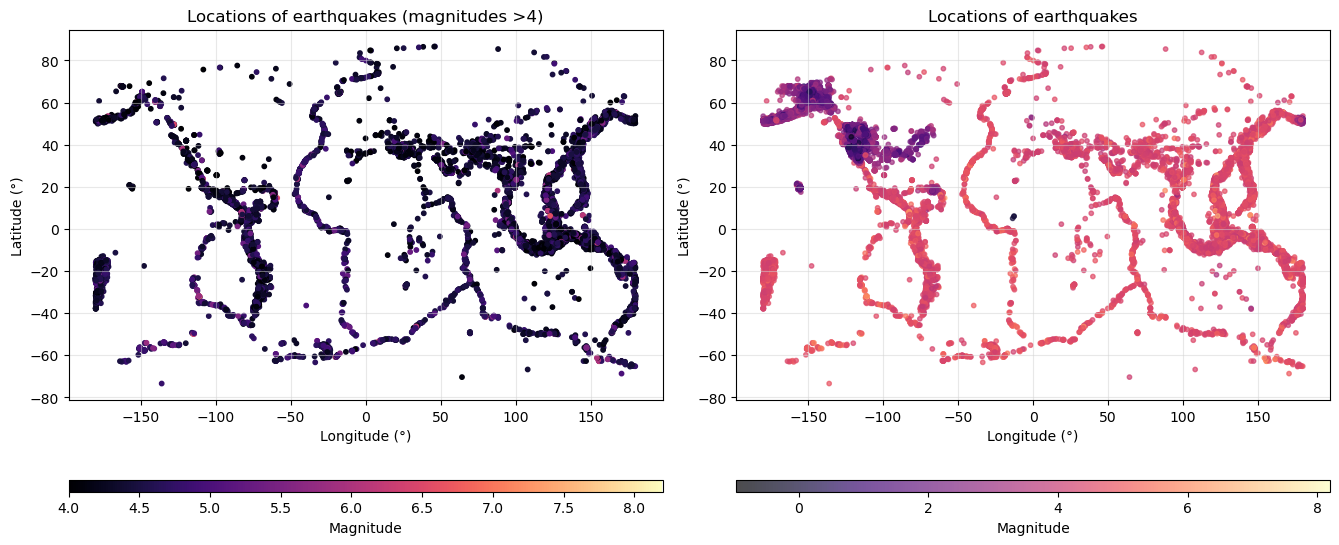

In [298]:
fig, ax = plt.subplots(figsize=(13.5,5.8), ncols=2)

filtered_earthquake_scatter = ax[0].scatter(filtered_mydf['longitude'], filtered_mydf['latitude'], c=filtered_mydf['mag'], cmap='magma', s=10, alpha=1);
ax[0].grid(which='major', linestyle = '-', color ='lightgray', alpha=0.5);
ax[0].set_title('Locations of earthquakes (magnitudes >4)');
ax[0].set_ylabel('Latitude (°)');
ax[0].set_xlabel('Longitude (°)');
plt.colorbar(filtered_earthquake_scatter, label ='Magnitude', aspect = 50, orientation = 'horizontal');

earthquake_scatter = ax[1].scatter(mydf['longitude'], mydf['latitude'], c=mydf['mag'], cmap='magma', s=10, alpha=0.7)
ax[1].grid(which='major', linestyle = '-', color ='lightgray', alpha=0.5);
ax[1].set_title('Locations of earthquakes');
ax[1].set_ylabel('Latitude (°)');
ax[1].set_xlabel('Longitude (°)');
plt.colorbar(earthquake_scatter, ax=ax[1], label ='Magnitude', aspect = 50, orientation = 'horizontal');

plt.tight_layout()
